### Importing dependencies

### Using dataset from kaggle (rajaranjith1999's tumour-dataset)

In [ ]:
from __future__ import absolute_import, division, print_function
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.  
import os
print(os.listdir("C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG")) #Loading data set with 1269 pictures

### 2 categories - Infected and Uninfected

In [ ]:
infected = os.listdir('C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/abnormal/') 
uninfected = os.listdir('C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/normal/')

In [ ]:

images =[]
classes=[]
for class_folder_name in os.listdir('C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG'):
    class_folder_path = os.path.join('C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG', class_folder_name)
    class_label = class_folder_name
    classes.append(class_label)

### Labeliing the two categories

In [ ]:
data=[]
labels=[]
Abnormal=os.listdir("C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/abnormal/")
for a in Abnormal:
    try:
        image=cv2.imread("C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/abnormal/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Normal=os.listdir("C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/normal/")
for b in Normal:
    try:
        image=cv2.imread("C:/Users/DELL/Downloads/TA-DL/dataset_breast_tumour/MIAS-JPEG/normal/"+b)
        image_from_array = Image.fromarray(image,"RGB")
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:

Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("Cells",Cells)
np.save("labels",labels)

In [ ]:

Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [ ]:
print('Cells : {} | labels : {}'.format(Cells.shape , labels.shape))

### Displaying the data

In [ ]:
plt.figure(1 , figsize = (22, 7))
n = 0 
for i in range(48):
    n += 1 
    r = np.random.randint(0 , Cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(Cells[r[0]])
    plt.title('{} : {}'.format('Abnormal' if labels[r[0]] == 1 else 'Normal',labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [136]:
num_classes=len(np.unique(labels))
len_data=len(Cells)


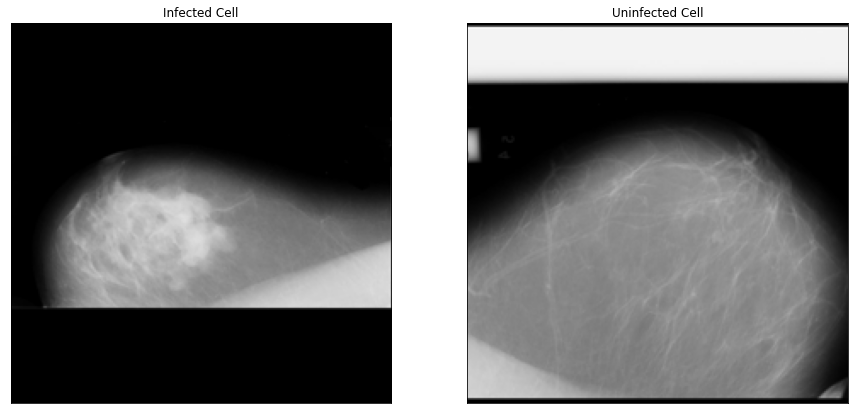

In [137]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(Cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(Cells[320])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [138]:

s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

### Splitting the data into test and train

In [139]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [140]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [141]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

 ### Architecture of the CNN (Single Layer) 

In [142]:
#creating sequential model for single layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               100352500 
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                

In [143]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
history = model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
23/23 [==============================] - 47s 2s/step - loss: 5.3596 - accuracy: 0.6229
Epoch 2/20
23/23 [==============================] - 38s 2s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 3/20
23/23 [==============================] - 37s 2s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 4/20
23/23 [==============================] - 31s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 5/20
23/23 [==============================] - 29s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 6/20
23/23 [==============================] - 27s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 7/20
23/23 [==============================] - 26s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 8/20
23/23 [==============================] - 25s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 9/20
23/23 [==============================] - 27s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 10/20
23/23 [==============================] - 33s 1s/step - loss: 5.5417 - accuracy: 0.6387
Epoch 11/20
23/23 [

In [145]:

#accuracy of the model when single layer is used
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])


4/4 [==============================] - 0s 113ms/step - loss: 5.4775 - accuracy: 0.6429

 Test_Accuracy:- 0.6428571343421936


In [156]:
model.metrics_names

['loss', 'accuracy']

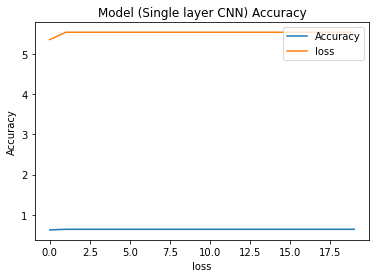

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model (Single layer CNN) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['Accuracy', 'loss'], loc='upper right')
plt.show()

 ### Architecture of the CNN (3 Layer) 

In [159]:
#Adding more layers to test the accuracy
#creating sequential model for 3 convolution layers
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 28, 28, 64)       

In [160]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
history = model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
23/23 [==============================] - 23s 1s/step - loss: 0.9295 - accuracy: 0.5652
Epoch 2/20
23/23 [==============================] - 22s 966ms/step - loss: 0.6460 - accuracy: 0.6387
Epoch 3/20
23/23 [==============================] - 23s 1s/step - loss: 0.6054 - accuracy: 0.6903
Epoch 4/20
23/23 [==============================] - 22s 970ms/step - loss: 0.5857 - accuracy: 0.6999
Epoch 5/20
23/23 [==============================] - 24s 1s/step - loss: 0.5632 - accuracy: 0.7183
Epoch 6/20
23/23 [==============================] - 24s 1s/step - loss: 0.5398 - accuracy: 0.7279
Epoch 7/20
23/23 [==============================] - 23s 1s/step - loss: 0.5052 - accuracy: 0.7524
Epoch 8/20
23/23 [==============================] - 23s 980ms/step - loss: 0.4628 - accuracy: 0.7778
Epoch 9/20
23/23 [==============================] - 23s 992ms/step - loss: 0.4238 - accuracy: 0.8066
Epoch 10/20
23/23 [==============================] - 26s 1s/step - loss: 0.3747 - accuracy: 0.8355
Epoch 1

In [162]:
model.metrics_names

['loss', 'accuracy']

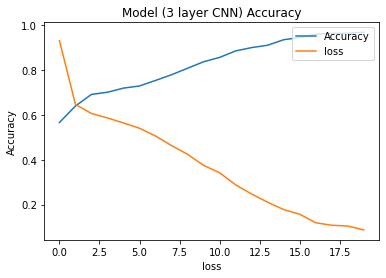

In [163]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model (3 layer CNN) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['Accuracy', 'loss'], loc='upper right')
plt.show()